# Goal

Show 2D distribution of temperature versus oxygen mass

In [1]:
import sys
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
sds = specds.load_dataset('SN2019odp')#, disable_cache=True)

In [3]:
spec = sds['ZTF19abqwtfu_20200821_Keck1_v1']
#spec = sds['ZTF19abqwtfu_20200124_Keck1_v1']
spec = spec[~np.isnan(spec['flux'])]
spec

<Table length=5127>
   col1       col2         col3    ... fluxerr mask      restwave     
 float64    float64      float64   ... float64 bool      float64      
--------- ------------ ----------- ... ------- ---- ------------------
3055.5166 -2.51726e-17 1.59557e-16 ...     nan True 3012.2813261261117
3057.4631  6.28556e-18 1.40631e-16 ...     nan True 3014.2002833333167
3059.4104  1.00302e-17 1.48725e-16 ...     nan True 3016.1200292205967
3061.3582 -1.59771e-18 1.56783e-16 ...     nan True 3018.0402680329234
3063.3064  1.91786e-17 1.57387e-16 ...     nan True  3019.960901185287
3065.2554  -5.9848e-18 1.63794e-16 ...     nan True 3021.8823230177263
3067.2048  2.48519e-18 1.39915e-16 ...     nan True  3023.804139190203
 3069.155 -1.21535e-17 1.35701e-16 ...     nan True 3025.7267440427545
3071.1057 -1.03304e-17 1.35954e-16 ...     nan True 3027.6498418203523
3073.0569  2.48908e-17 1.09118e-16 ...     nan True 3029.5734325229973
      ...          ...         ... ...     ...  ...                ...
10293.091 -6.05665e-18 3.05589e-16 ...     nan True 10147.444725849877
10294.274  4.67831e-18 3.43863e-16 ...     nan True 10148.610986510612
10295.458  6.19519e-18 3.45899e-16 ...     nan True 10149.778233021443
10296.641 -3.26471e-18 3.25493e-16 ...     nan True 10150.944493682178
10297.824 -4.06938e-18  2.9428e-16 ...     nan True 10152.110754342915
10299.007 -9.96087e-18 2.20686e-16 ...     nan True 10153.277015003652
10300.191  5.60149e-18 1.49767e-16 ...     nan True 10154.444261514484
10301.374 -1.84071e-18 1.33735e-16 ...     nan True 10155.610522175219
10302.557   2.7053e-18  1.4636e-16 ...     nan True 10156.776782835956
 10303.74 -8.23702e-19  1.6083e-16 ...     nan True  10157.94304349669

<Column name='flux' dtype='float64' length=146>
 1.3076518578959481e-17
-1.9196257840488333e-19
  5.301634464169638e-18
 3.5025465934713275e-18
  3.602166580293005e-18
  4.066445851774395e-18
 3.2383721625217267e-18
 2.7252756786557455e-18
  5.198362206472747e-18
  3.410691746297674e-18
   3.22662955460114e-18
 1.6446054228119785e-18
                    ...
   6.67561719155316e-19
  4.089972553381867e-18
  5.760343296012395e-19
  3.803506321793987e-18
  3.904989355890931e-18
 4.4362948181647304e-18
   4.13100732890511e-18
  3.849187819681719e-18
 1.2238375094774034e-18
 -7.750981881792175e-19
  5.880963126756731e-18
  3.855954302076508e-18

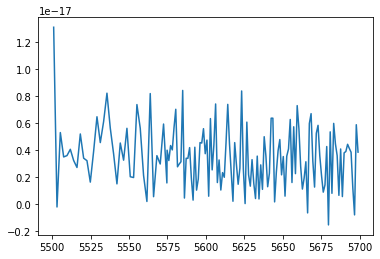

In [4]:
idx = np.logical_and(spec['restwave'] > 5500, spec['restwave'] < 5700)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
continuum_level_5577 = 1/1e18
continuum_slope_5577 = -0.01/1e18
amplitude_5577 = 1e-16
line_width = 30
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width, 0.0)
#plt.plot(spec['restwave'][idx], modflux)
spec['flux'][idx]

In [5]:
#cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5669, start6300_6364=6150, stop6300_6364=6450, extra_lines=np.array([]))
cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5669, start6300_6364=6150, stop6300_6364=6450, extra_lines=np.array([6243]))


In [6]:
results, samples = oxygen.run_dynesty_fit(cfg)

73511it [09:54, 123.55it/s, batch: 3 | bound: 625 | nc: 25 | ncall: 1898257 | eff(%):  3.873 | loglstar: -869.268 < -859.502 < -862.930 | logz: -918.761 +/-  0.324 | stop:  0.925]        


	Mean: array([ 2.10380883e+00,  5.35229633e+03,  3.30743758e+01,  3.76414561e-01,
        9.00210817e-03,  4.29997852e-04,  1.64719961e-03,  1.98162247e+26,
       -4.89580251e+00,  2.52847880e+00, -7.44263591e-01,  5.12355769e-03,
        3.97670545e+00])
	Cov: array([[ 1.52451832e+00, -1.00132522e+03, -9.27475911e-05,
		        -4.85713705e-04, -3.47041665e-07, -1.09980111e-06,
		        -4.52357709e-06, -2.70193856e+21, -3.79641264e-03,
		         1.23079885e-03,  7.10287451e-04,  4.09552957e-03,
		        -2.09361131e-04],
		       [-1.00132522e+03,  8.69625055e+05, -3.70556282e-01,
		         3.26762727e-01, -2.17019389e-02,  2.89807108e-03,
		         4.13678192e-03,  2.51961211e+24,  5.23494095e-01,
		         2.03444019e+01,  6.69558473e-01, -2.73255650e+00,
		        -3.60372453e-01],
		       [-9.27475911e-05, -3.70556282e-01,  1.28977444e-03,
		         4.00769770e-06,  3.74580474e-07, -1.84172051e-07,
		         9.09260104e-10,  1.78379550e+20, -1.22763914e-04,
		         1

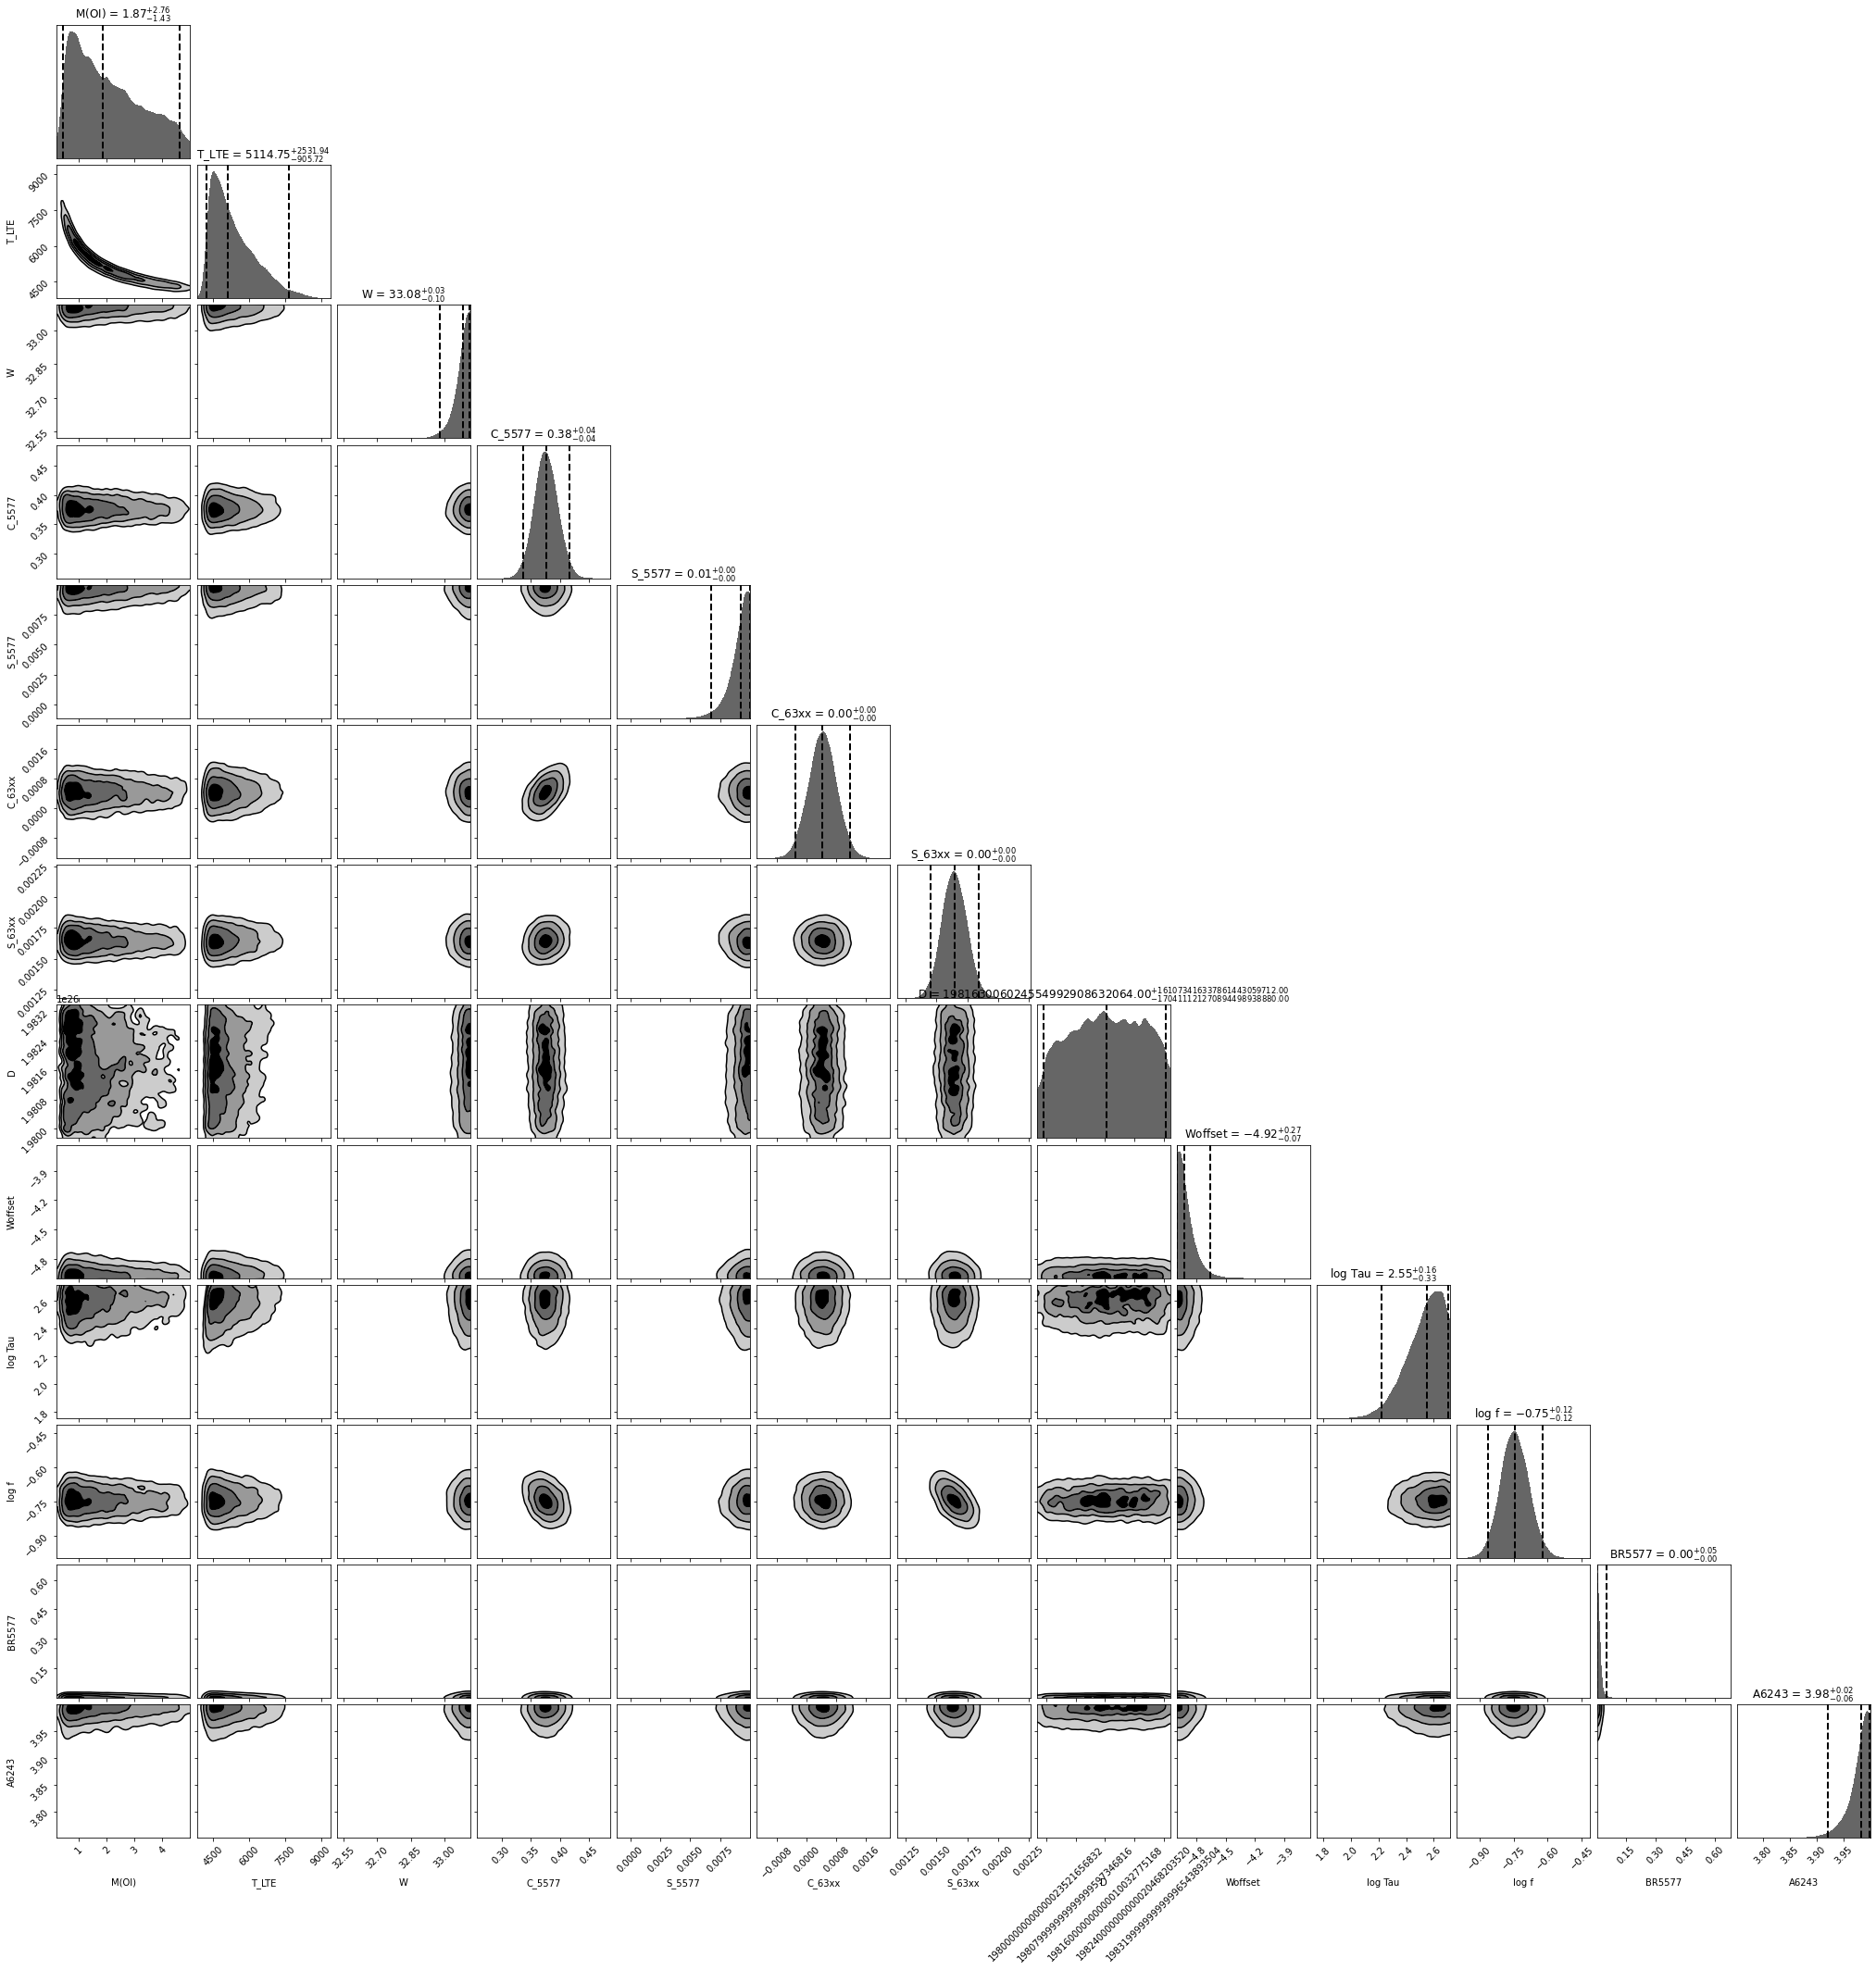

In [7]:
LABELS = ['M(OI)', 'T_LTE', 'W', 'C_5577', 'S_5577', 'C_63xx', 'S_63xx', 'D', 'Woffset', 'log Tau', 'log f', 'BR5577', 'A6243']
_=dyplot.cornerplot(results, labels=LABELS, show_titles=True)

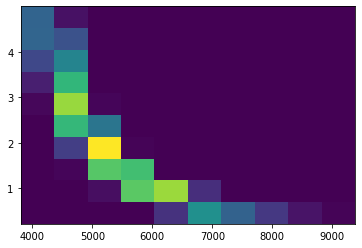

In [8]:
samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)
plt.hist2d(new_samples[:,1], new_samples[:,0]);

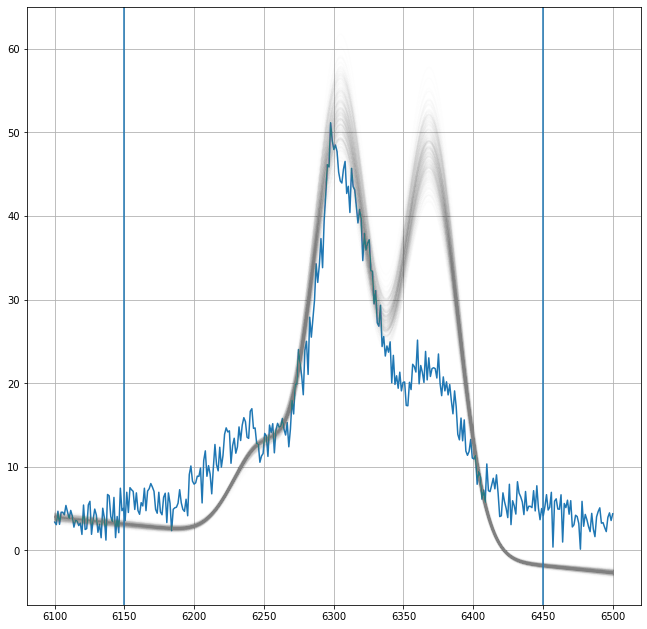

In [9]:
plt.figure(figsize=(11,11))

idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx]*1e18)
#continuum_level_6300_6364 = 0.3e-17
#continuum_slope_6300_6364 = 0.03/1e18
#amplitude_6300 = 1.3e-15
#amplitude_6364 = 0.5e-15
#line_width = 16
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width)



#print(len(new_samples))
#print(cfg.extra_lines.dtype)
for i in range(300):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    #p[0] /= 1.3
    #oxygen_masses[i] = p[0]
    p[2] = 20
    
    line_width = p[2]#*1.3
    wlen_offset = p[8]
    #line_skew = p[12]
    #p[9] -= 3

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17
    
    extra_lines_amps = np.exp(p[12:])/1e17
    #print(extra_lines_amps.dtype)

    fluxes = oxygen.create_fluxes(p)
    #fluxes = create_fluxes(p)
    
    amplitude_5577 = fluxes[0]
    amplitude_6300 = fluxes[1]
    amplitude_6364 = fluxes[2]
    
    #print(spec['restwave'][idx]+wlen_offset)
    modflux = np.empty(len(spec['restwave'][idx]))
    for j in range(len(modflux)):
        modflux[j] = oxygen.generation_func_6300_6364((spec['restwave'][idx]+wlen_offset)[j], continuum_level_6300_6364, continuum_slope_6300_6364, amplitude_6300, amplitude_6364, line_width, cfg.extra_lines, extra_lines_amps)
    plt.plot(spec['restwave'][idx], modflux*1e18, alpha=0.01, color='grey')
plt.axvline(cfg.start6300_6364)
plt.axvline(cfg.stop6300_6364)
plt.grid()
#plt.gca().set_ylim((0.0e-17, 4e-17))
#plt.hist(oxygen_masses)

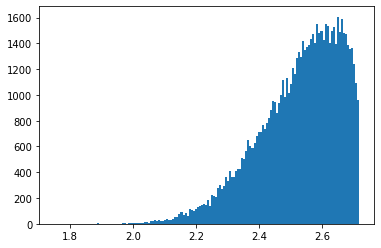

In [10]:
plt.hist(new_samples[:,9], bins=150);

In [11]:
oxygen.calculate_line_luminosity_63xx(1, 3000, 1, 6300)

2.2714636387206566e+38

In [12]:
oxygen.calculate_line_luminosity_63xx(1, 3000, 1, 6364)

9.832983210190611e+37

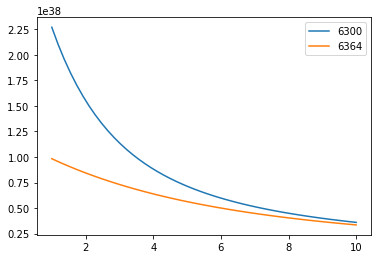

In [13]:
tau = np.linspace(1, 10)
plt.plot(tau, oxygen.calculate_line_luminosity_63xx(1, 3000, tau, 6300), label='6300')
plt.plot(tau, oxygen.calculate_line_luminosity_63xx(1, 3000, tau, 6364), label='6364')
plt.legend()

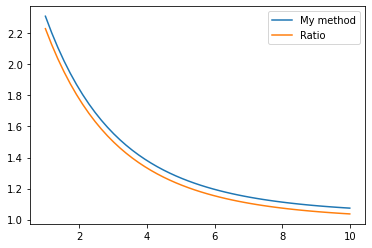

In [14]:
tau = np.linspace(1, 10)
plt.plot(tau, oxygen.calculate_line_luminosity_63xx(1, 3000, tau, 6300)/oxygen.calculate_line_luminosity_63xx(1, 3000, tau, 6364), label='My method')
plt.plot(tau, (1-np.exp(-tau))/(1-np.exp(-tau/3)), label='Ratio')
plt.legend()

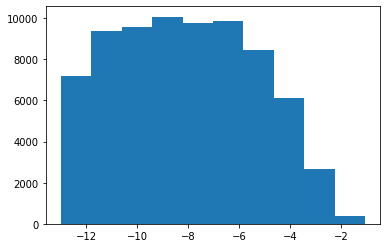

In [15]:
plt.hist(np.log(new_samples[:,11]));